In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from dateutil import parser
import seaborn as sns
from pandas.io.json import json_normalize

In [6]:
PLOT_COLORS = ['#268BD2', "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style = 'ticks')
plt.rc('figure', figsize = (8,5), dpi = 100)
plt.rc('axes', labelpad = 20, facecolor = "#ffffff", linewidth = 0.4, grid = True, labelsize = 14)
plt.rc('patch', linewidth = 0)
plt.rc('xtick.major', width = 0.2)
plt.rc('ytick.major', width = 0.2)
plt.rc('grid', color ='#9E9E9E', linewidth = 0.4)
plt.rc('font', family = 'Arial', weight = '400', size = 10)
plt.rc('text', color = '#282828')
plt.rc('savefig', pad_inches = 0.3, dpi = 300)

In [7]:
path = r'..\dataset_for_Data_analysis_visualization\tmdb_5000_movies.csv'

df = pd.read_csv(path)

df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.44,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.20,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.08,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.90,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.38,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.00,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.30,4466


In [103]:
df = df.drop(['title','genres', 'keywords','homepage', 'id', 'overview', 'production_companies', 'production_countries', 'spoken_languages', 'tagline' ], axis = 1)

In [129]:
df.dropna(inplace = True, axis = 0)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4802
Data columns (total 11 columns):
budget               4800 non-null int64
original_language    4800 non-null object
original_title       4800 non-null object
popularity           4800 non-null float64
release_date         4800 non-null object
revenue              4800 non-null int64
runtime              4800 non-null float64
status               4800 non-null object
vote_average         4800 non-null float64
vote_count           4800 non-null int64
profit               4800 non-null int64
dtypes: float64(3), int64(4), object(4)
memory usage: 450.0+ KB


In [105]:
df.head()

,budget,original_language,original_title,popularity,release_date,revenue,runtime,status,vote_average,vote_count
0,237000000,en,Avatar,150.44,2009-12-10,2787965087,162.00,Released,7.20,11800
1,300000000,en,Pirates of the Caribbean: At World's End,139.08,2007-05-19,961000000,169.00,Released,6.90,4500
2,245000000,en,Spectre,107.38,2015-10-26,880674609,148.00,Released,6.30,4466
3,250000000,en,The Dark Knight Rises,112.31,2012-07-16,1084939099,165.00,Released,7.60,9106
4,260000000,en,John Carter,43.93,2012-03-07,284139100,132.00,Released,6.10,2124


In [106]:
df['profit'] = df['revenue'] - df['budget']

In [107]:
df.head()

,budget,original_language,original_title,popularity,release_date,revenue,runtime,status,vote_average,vote_count,profit
0,237000000,en,Avatar,150.44,2009-12-10,2787965087,162.00,Released,7.20,11800,2550965087
1,300000000,en,Pirates of the Caribbean: At World's End,139.08,2007-05-19,961000000,169.00,Released,6.90,4500,661000000
2,245000000,en,Spectre,107.38,2015-10-26,880674609,148.00,Released,6.30,4466,635674609
3,250000000,en,The Dark Knight Rises,112.31,2012-07-16,1084939099,165.00,Released,7.60,9106,834939099
4,260000000,en,John Carter,43.93,2012-03-07,284139100,132.00,Released,6.10,2124,24139100


In [108]:
df.describe( include = 'all')

,budget,original_language,original_title,popularity,release_date,revenue,runtime,status,vote_average,vote_count,profit
count,4803.00,4803,4803,4803.00,4802,4803.00,4801.00,4803,4803.00,4803.00,4803.00
unique,nan,37,4801,nan,3280,nan,nan,3,nan,nan,nan
top,nan,en,Batman,nan,2006-01-01,nan,nan,Released,nan,nan,nan
freq,nan,4505,2,nan,10,nan,nan,4795,nan,nan,nan
mean,29045039.88,NaN,NaN,21.49,NaN,82260638.65,106.88,NaN,6.09,690.22,53215598.78
std,40722391.26,NaN,NaN,31.82,NaN,162857100.94,22.61,NaN,1.19,1234.59,135967700.45
min,0.00,NaN,NaN,0.00,NaN,0.00,0.00,NaN,0.00,0.00,-165710090.00
25%,790000.00,NaN,NaN,4.67,NaN,0.00,94.00,NaN,5.60,54.00,-799537.50
50%,15000000.00,NaN,NaN,12.92,NaN,19170001.00,103.00,NaN,6.20,235.00,2511317.00
75%,40000000.00,NaN,NaN,28.31,NaN,92917187.00,118.00,NaN,6.80,737.00,55312860.00


In [109]:
df.head()

,budget,original_language,original_title,popularity,release_date,revenue,runtime,status,vote_average,vote_count,profit
0,237000000,en,Avatar,150.44,2009-12-10,2787965087,162.00,Released,7.20,11800,2550965087
1,300000000,en,Pirates of the Caribbean: At World's End,139.08,2007-05-19,961000000,169.00,Released,6.90,4500,661000000
2,245000000,en,Spectre,107.38,2015-10-26,880674609,148.00,Released,6.30,4466,635674609
3,250000000,en,The Dark Knight Rises,112.31,2012-07-16,1084939099,165.00,Released,7.60,9106,834939099
4,260000000,en,John Carter,43.93,2012-03-07,284139100,132.00,Released,6.10,2124,24139100


In [118]:
df1 = df['original_language'].value_counts().to_frame().reset_index().rename(columns = {'index': 'language', 'original_language': 'No'})

In [119]:
df2 = df1[df1['No'] > 15]
df2

,language,No
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16


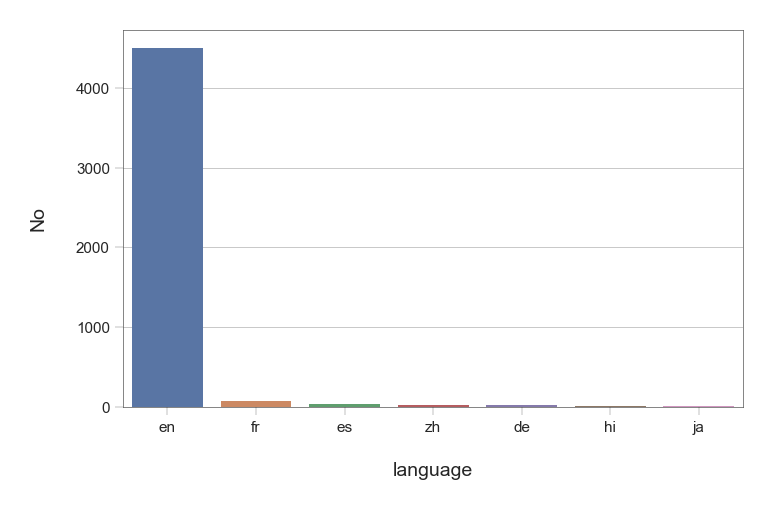

In [120]:
fig,ax = plt.subplots()
sns.barplot(x = 'language', y = 'No', data = df2, )

##### The most  common language is english

In [126]:
parser.parse('2009-12-10').strftime("%A")

'Thursday'

In [132]:
df['day'] = df['release_date'].apply(lambda x: parser.parse(x).strftime('%A'))

In [133]:
df1 = df['day'].value_counts().to_frame().reset_index().rename(columns = {'index': 'day', 'day': 'No'})

,day,No
0,Friday,2053
1,Thursday,915
2,Wednesday,795
3,Tuesday,351
4,Saturday,236
5,Monday,233
6,Sunday,217


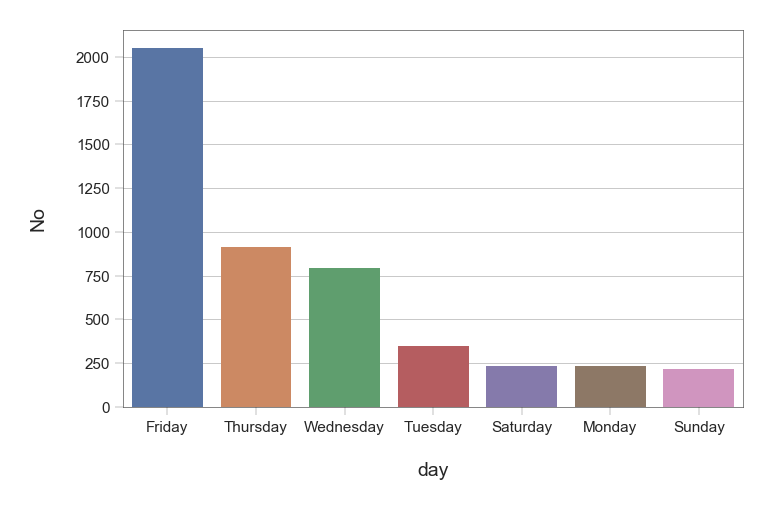

In [135]:
fig,ax = plt.subplots()
sns.barplot(x = 'day', y = 'No', data = df1 )

#### Most of the movies where released on Fridays

In [154]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year

In [159]:
df1 = df['year'].value_counts().to_frame().reset_index().rename(columns = {'index': 'year', 'year': 'No'})
df1 = df1[df1['No'] > 200]

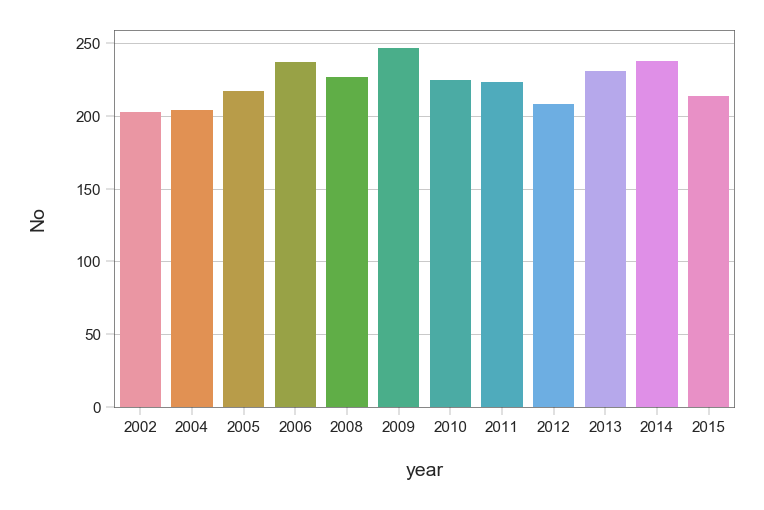

In [160]:
fig,ax = plt.subplots()
sns.barplot(x = 'year', y = 'No', data = df1)

#### Most of the films where released in the year 2009

In [161]:
df.head(5)

,budget,original_language,original_title,popularity,release_date,revenue,runtime,status,vote_average,vote_count,profit,day,year
0,237000000,en,Avatar,150.44,2009-12-10,2787965087,162.00,Released,7.20,11800,2550965087,Thursday,2009
1,300000000,en,Pirates of the Caribbean: At World's End,139.08,2007-05-19,961000000,169.00,Released,6.90,4500,661000000,Saturday,2007
2,245000000,en,Spectre,107.38,2015-10-26,880674609,148.00,Released,6.30,4466,635674609,Monday,2015
3,250000000,en,The Dark Knight Rises,112.31,2012-07-16,1084939099,165.00,Released,7.60,9106,834939099,Monday,2012
4,260000000,en,John Carter,43.93,2012-03-07,284139100,132.00,Released,6.10,2124,24139100,Wednesday,2012


In [190]:
df3 = df[['original_title', 'runtime', 'vote_average', 'profit', 'popularity']]

In [191]:
df4 = df3.groupby('original_title', as_index = False).mean()

df5 = df4.sort_values('runtime', ascending = False)
df5 = df5[df5['runtime'] > 220]
df5

,original_title,runtime,vote_average,profit,popularity
674,Carlos,338.00,6.70,-17128721,1.14
3557,The Company,276.00,7.00,0,1.49
1426,Gettysburg,254.00,6.60,25000000,5.53
782,Cleopatra,248.00,6.70,39885000,13.24
1537,Hamlet,242.00,7.30,0,9.81
1153,Emma,240.00,7.60,0,2.14
1466,Gone with the Wind,238.00,7.70,396176459,48.98
2542,Once Upon a Time in America,229.00,8.20,-30000000,49.34
4651,Woodstock,225.00,7.10,33905110,3.41


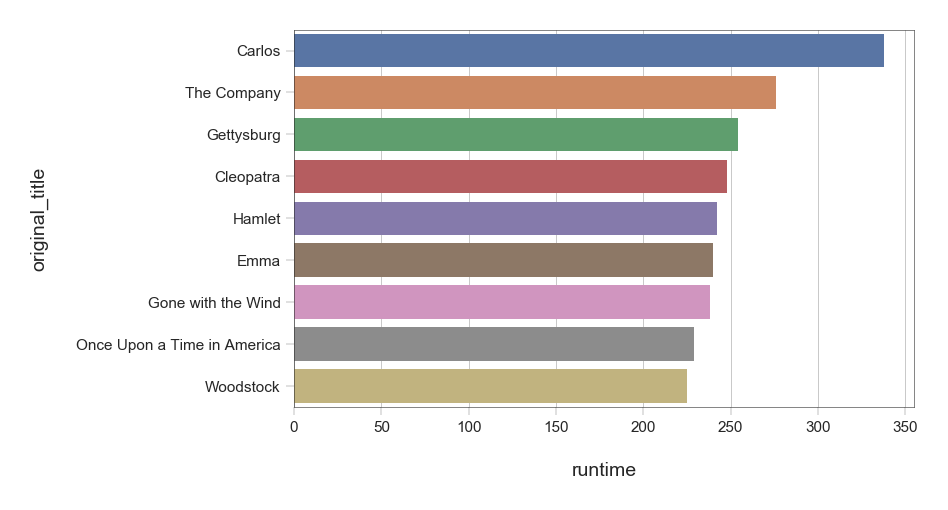

In [192]:
fig,ax = plt.subplots()
sns.barplot(x = 'runtime', y = 'original_title', data = df5)

#### Carlos is the movie with the highest runtime of 338 minutes

In [193]:
df4 = df3.groupby('original_title', as_index = False).mean()

df5 = df4.sort_values('vote_average', ascending = False)
df5 = df5[df5['vote_average'] > 9]
df5

,original_title,runtime,vote_average,profit,popularity
2098,Little Big Top,0.00,10.00,0,0.09
896,"Dancer, Texas Pop. 81",97.00,10.00,565592,0.38
2245,Me You and Five Bucks,90.00,10.00,-1,0.09
3258,Stiff Upper Lips,99.00,10.00,0,0.36
2947,Sardaarji,0.00,9.50,0,0.30
2550,One Man's Hero,121.00,9.30,0,0.91


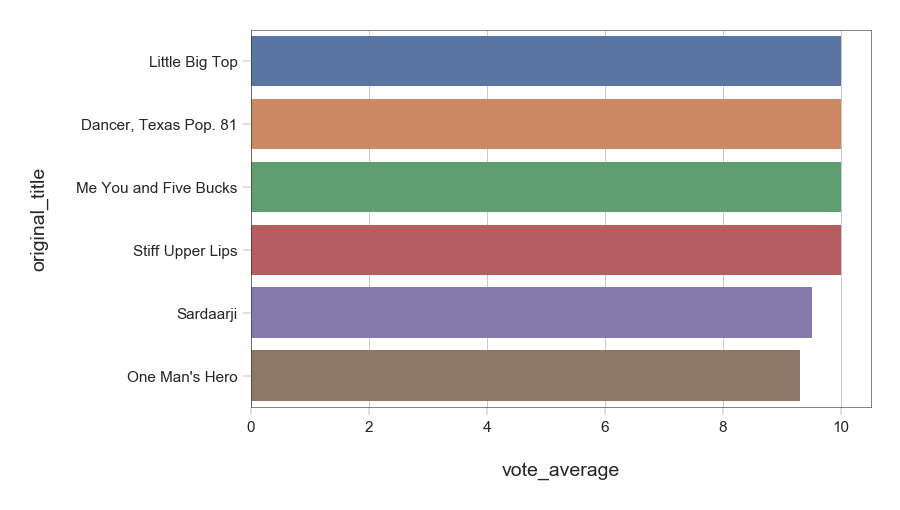

In [194]:
fig,ax = plt.subplots()
sns.barplot(x = 'vote_average', y = 'original_title', data = df5)

#### Little Big Top,Dancer, Texas Pop.81,Me You and Five Bucks and Stiff Upper Lips are the movies withe the most vote average of 10

In [195]:
df5 = df4.sort_values('profit', ascending = False)
df5 = df5[df5['profit'] > 1000000000]
df5

,original_title,runtime,vote_average,profit,popularity
371,Avatar,162.00,7.20,2550965087,150.44
4345,Titanic,194.00,7.50,1645034188,100.03
1915,Jurassic World,124.00,6.50,1363528810,418.71
1389,Furious 7,137.00,7.30,1316249360,102.32
3436,The Avengers,143.00,7.40,1299557910,144.45
372,Avengers: Age of Ultron,141.00,7.30,1125403694,134.28
1377,Frozen,102.00,7.30,1124219009,165.13
2304,Minions,91.00,6.40,1082730962,875.58
3901,The Lord of the Rings: The Return of the King,201.00,8.10,1024888979,123.63
1830,Iron Man 3,130.00,6.80,1015439994,77.68


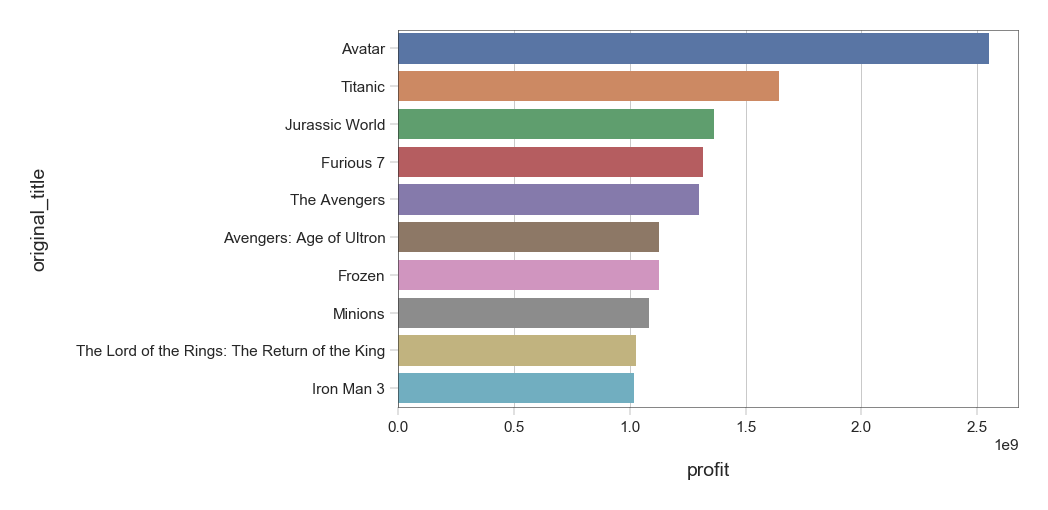

In [196]:
fig,ax = plt.subplots()
sns.barplot(x = 'profit', y = 'original_title', data = df5)

#### Avatar is the movie with the most profit of 2.5 billion plus profit

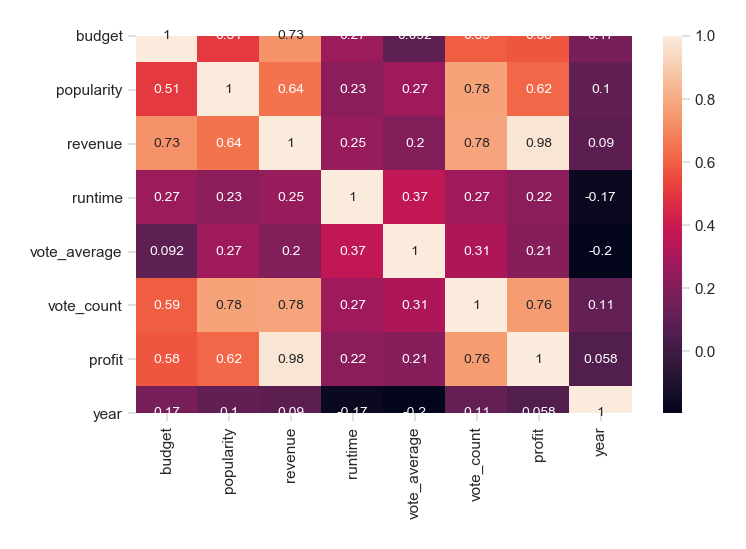

In [197]:
fig,ax = plt.subplots()
sns.heatmap(df.corr(), annot = True)

In [199]:
df4 = df3.groupby('original_title', as_index = False).mean()

df5 = df4.sort_values('popularity', ascending = False)
df5 = df5[df5['popularity'] > 400]
df5

,original_title,runtime,vote_average,profit,popularity
2304,Minions,91.00,6.40,1082730962,875.58
1811,Interstellar,169.00,8.10,510120017,724.25
936,Deadpool,108.00,7.40,725112979,514.57
1512,Guardians of the Galaxy,121.00,7.90,603328629,481.10
2174,Mad Max: Fury Road,120.00,7.20,228858340,434.28
1915,Jurassic World,124.00,6.50,1363528810,418.71


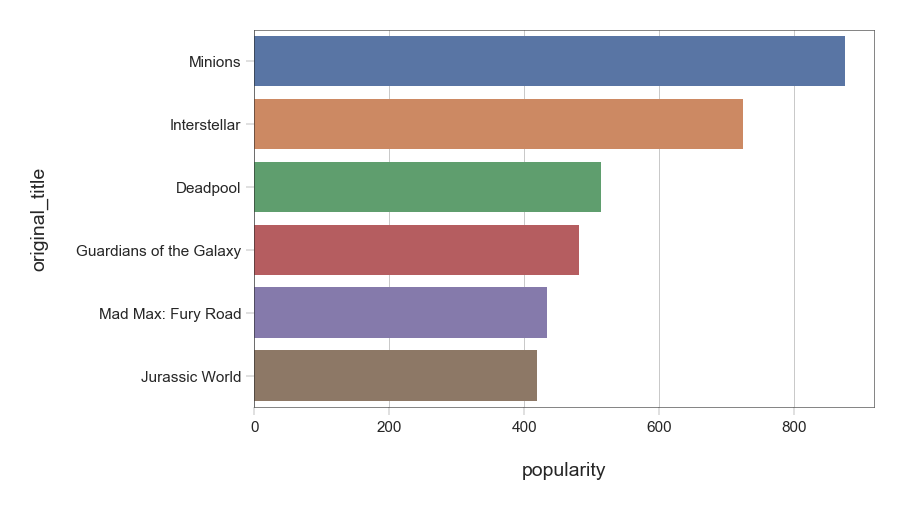

In [200]:
fig,ax = plt.subplots()
sns.barplot(x = 'popularity', y = 'original_title', data = df5)

#### Minions is the most popular  movie

In [201]:
df['status'].value_counts()

Released           4792
Rumored               5
Post Production       3
Name: status, dtype: int64